In [115]:
# Importing all the important libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from ydata_profiling import ProfileReport

In [76]:
# loading dataset using pandas

df = pd.read_csv('/content/drive/MyDrive/Food_data.csv')

In [77]:
# Checking the top few rows of data.

df.head(10)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
5,5,3/2/2023,241.0,18,16.863506,79.285920,3,0,11.834878,Intermediate,dairy
6,6,4/18/2022,443.0,16,19.888627,77.328136,0,0,22.862659,Beginner,Vegetables
7,7,12/16/2023,416.0,16,18.559591,75.786502,5,1,34.599442,Intermediate,MeAt
8,8,7/7/2023,439.0,18,24.111027,43.395803,4,0,17.459149,EXPERT,dairy
9,9,11/7/2023,267.0,7,25.412493,89.405183,1,0,23.067392,EXPERT,GRAINS


# Data Exploration.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


## Step 1: Checking the Data types and correcting them


In [79]:
# Checking the data types of each column

df.dtypes

,0
ID,int64
date,object
meals_served,float64
kitchen_staff,object
temperature_C,float64
humidity_percent,float64
day_of_week,int64
special_event,object
past_waste_kg,float64
staff_experience,object


In [80]:
# Looking at the dtypes first we have check the columns with problems first we will deal with date column

df['date'].unique()

array(['12/19/2022', '11/21/2023', '2/1/2022', '3/19/2023', '7/18/2022',
       '3/2/2023', '4/18/2022', '12/16/2023', '7/7/2023', '11/7/2023',
       '6/8/2022', '4/21/2023', '1/25/2022', '9/10/2023', '4/29/2023',
       '6/3/2024', '10/13/2023', '9/2/2022', '4/27/2024', '9/9/2024',
       '4/8/2024', '7/25/2023', '3/1/2022', '10/18/2022', '3/12/2022',
       '12/11/2022', '7/4/2022', '5/22/2022', '1/26/2023', '5/7/2023',
       '4/6/2024', '4/12/2022', '1/20/2024', '7/6/2023', '11/3/2022',
       '9/13/2024', '11/18/2022', '3/10/2024', '1/1/2024', '11/9/2023',
       '10/16/2023', '3/18/2022', '7/12/2022', '3/28/2022', '4/4/2023',
       '2/18/2022', '7/7/2024', '1/4/2022', '11/6/2022', '1/14/2024',
       '5/23/2024', '2/3/2023', '9/9/2023', '2/19/2022', '7/19/2022',
       '8/22/2023', '8/27/2024', '6/1/2024', '5/13/2023', '8/27/2023',
       '1/11/2022', '6/7/2024', '11/2/2023', '7/26/2024', '7/17/2024',
       '7/12/2023', '9/29/2023', '4/14/2024', '8/6/2023', '11/30/2022',
     

In [81]:
# Checking that all the data is consistent.

df['waste_category'].unique()

array(['dairy', 'MeAt', 'MEAT', 'Vegetables', 'GRAINS', nan, 'Wheat',
       'Barley'], dtype=object)

In [82]:
# I am converting all the text in to upper because there are some values which the same but not in the same case so by using this function all of our values will be in a uniform format.

df['waste_category'] = df['waste_category'].str.upper() #

In [83]:
# Checking the date column we know that there are no inconsistency so we will change it's dtype from object to date_time format

df['date'] = pd.to_datetime(df['date'])

In [84]:
# Now we check the problem in the columns kitchen_staff and special_event

print({col: df[col].unique().tolist() for col in ['kitchen_staff', 'special_event']})

{'kitchen_staff': ['13', '15', '16', '19', '10', '18', '7', '5', '12', '8', '17', '11', '9', '6', nan, '14', 'ten ', 'eleven'], 'special_event': ['0', '1', 'One ']}


In [85]:
# As we got some values in object format in our previous cloumn we will convert those to int format and also change the dtype of these columns from object to int.

# Define a mapping for text-based numbers

text_to_num = {
    'ten ': 10,
    'eleven': 11,
    'One ': 1
}

# Function to convert values to integers
def convert_to_int(value):
    if pd.isna(value):  # Handle NaN values
        return None
    if value in text_to_num:  # Convert text representations
        return text_to_num[value]
    try:
        return int(value)  # Convert numeric strings
    except ValueError:
        return None  # Handle unexpected values gracefully

# Apply conversion
df['kitchen_staff'] = df['kitchen_staff'].map(convert_to_int)
df['special_event'] = df['special_event'].map(convert_to_int)


## Step 2: Checking missing values & Duplicates

In [86]:
# Checking duplicates in our data

df.duplicated().sum()

np.int64(0)

In [87]:
# Now we check missing values in our data

df.isnull().sum()

,0
ID,0
date,0
meals_served,32
kitchen_staff,18
temperature_C,0
humidity_percent,16
day_of_week,0
special_event,0
past_waste_kg,16
staff_experience,337


In [88]:
# Checking the percentage of missing values in each column

def check_missing_values(df):
    """
    Returns a summary of missing values for each column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        pd.DataFrame: A table showing the count and percentage of missing values per column.
    """
    missing_count = df.isnull().sum()  # Count missing values per column
    missing_percent = (missing_count / len(df)) * 100  # Calculate percentage

    missing_summary = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage (%)': missing_percent
    })

    return missing_summary.sort_values(by='Missing Values', ascending=False)

# Example usage:
print(check_missing_values(df))

                  Missing Values  Percentage (%)
staff_experience             337       18.496158
meals_served                  32        1.756312
waste_category                21        1.152580
kitchen_staff                 18        0.987925
humidity_percent              16        0.878156
past_waste_kg                 16        0.878156
ID                             0        0.000000
date                           0        0.000000
temperature_C                  0        0.000000
day_of_week                    0        0.000000
special_event                  0        0.000000


## Step 3: Imputing missing values.

In [89]:
# As staff_eperience contains categorical data and also te misssing values in this columns are too many so i will be replacing them with the most frequent value

df['staff_experience'] = df['staff_experience'].fillna(df['staff_experience'].mode()[0])

In [90]:
# We will also replace all the missing values in the waste_category with most reaccuring value because it is categorical data and this is most suitable approch.

df['waste_category'] = df['waste_category'].fillna(df['waste_category'].mode()[0])

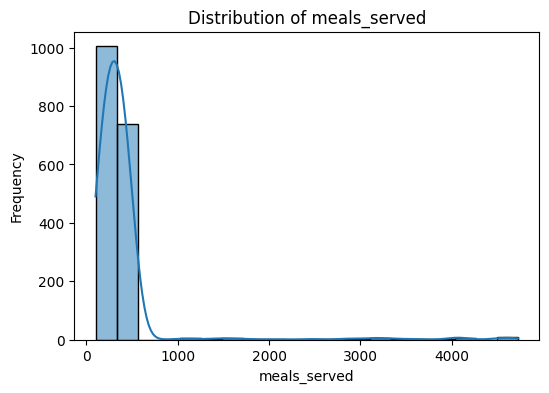

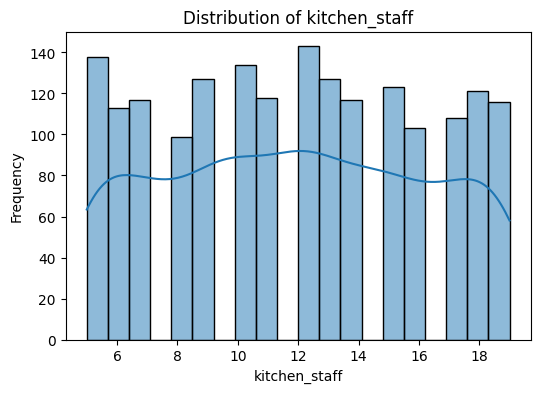

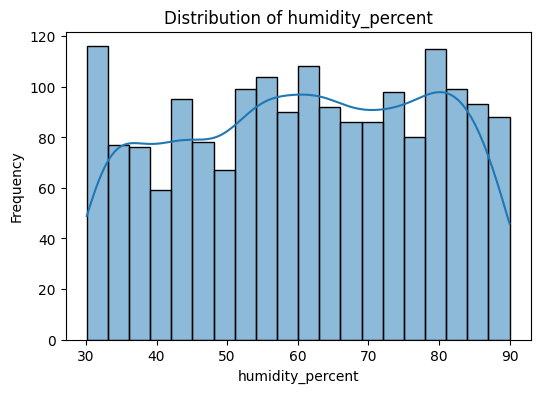

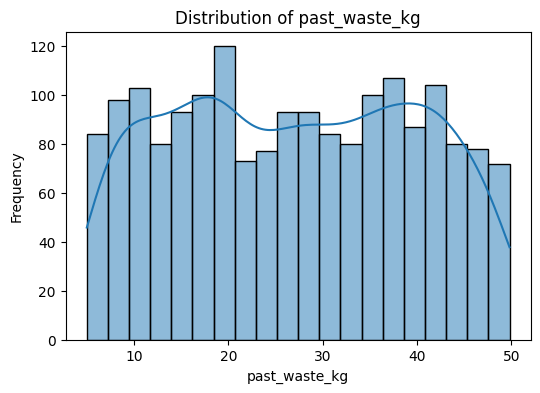

In [91]:
# Plot histograms to check distribution to get better understanding of our data and replace missing values accordingly.

num_cols = ['meals_served', 'kitchen_staff', 'humidity_percent', 'past_waste_kg']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [92]:
# Since the meals_served column is right-skewed, using the mean would inflate values due to large outliers. The median is a better option

df['meals_served'].fillna(df['meals_served'].median(), inplace=True)

<ipython-input-92-e888751607ee>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['meals_served'].fillna(df['meals_served'].median(), inplace=True)


In [93]:
# Since kitchen_staff is relatively uniform (values are evenly spread), using mode is a reasonable approach

df['kitchen_staff'].fillna(df['kitchen_staff'].mode()[0], inplace=True)

<ipython-input-93-2a39cc9f4f6c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kitchen_staff'].fillna(df['kitchen_staff'].mode()[0], inplace=True)


In [94]:
# Since humidity_percent is evenly distributed, the mean should be a good approximation

df['humidity_percent'].fillna(df['humidity_percent'].mean(), inplace=True)

<ipython-input-94-10d0b61d9cbc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['humidity_percent'].fillna(df['humidity_percent'].mean(), inplace=True)


In [95]:
# Like humidity, past_waste_kg is uniformly distributed, so the mean should work well

df['past_waste_kg'].fillna(df['past_waste_kg'].mean(), inplace=True)

<ipython-input-95-32ef50100126>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['past_waste_kg'].fillna(df['past_waste_kg'].mean(), inplace=True)


### Summary Statistics.

In [96]:
# To get the statistical sunnary of only numerical coloumns we will use this function.

df.describe()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
count,1822.000000,1822,1822.000000,1822.000000,1822.000000,1822.000000,1822.00000,1822.000000,1822.000000
mean,910.500000,2023-04-22 09:30:37.541163520,372.327113,11.905598,22.189280,60.791257,3.01427,0.085620,26.997534
min,0.000000,2022-01-01 00:00:00,100.000000,5.000000,-10.372207,30.121111,0.00000,0.000000,5.008394
25%,455.250000,2022-07-25 06:00:00,212.250000,8.000000,15.684259,46.137537,1.00000,0.000000,16.148956
50%,910.500000,2023-04-23 00:00:00,306.000000,12.000000,22.115040,61.514385,3.00000,0.000000,26.997534
75%,1365.750000,2024-01-07 18:00:00,405.750000,15.000000,28.807494,75.755784,5.00000,0.000000,37.978663
max,1821.000000,2024-09-26 00:00:00,4730.000000,19.000000,60.000000,89.982828,6.00000,1.000000,49.803703
std,526.110413,NaN,490.505492,4.270492,8.919939,17.249947,2.00899,0.279879,12.735569


# Section: 2

### Now that all of our data is cleaned. We will move towards taking insights from our data.

## Visualizing Distributions

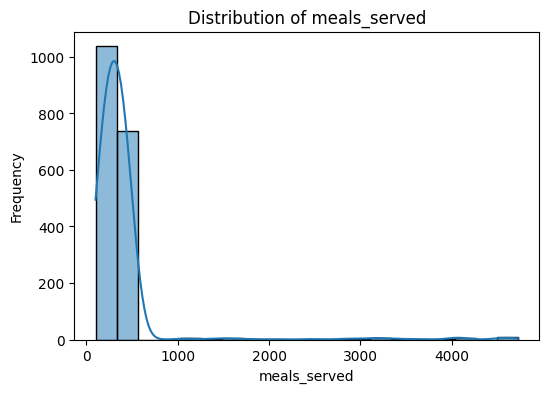

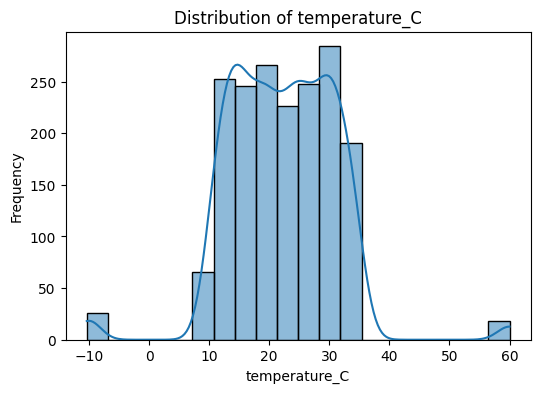

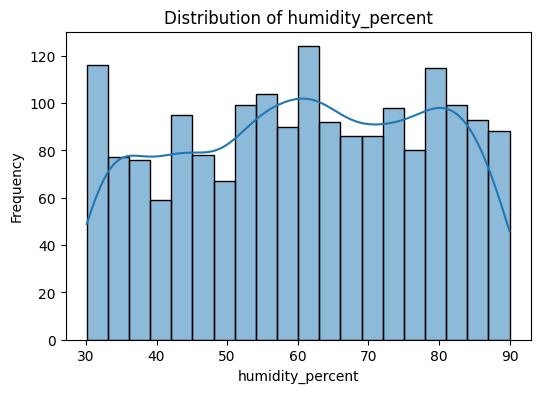

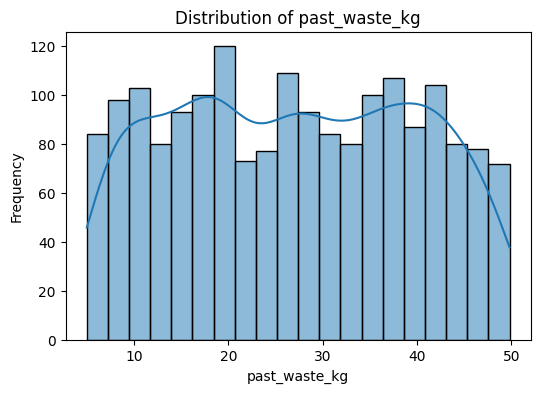

In [97]:
# Define numerical columns

num_cols = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg']

# Writing Function to create histograms for each of numerical column

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

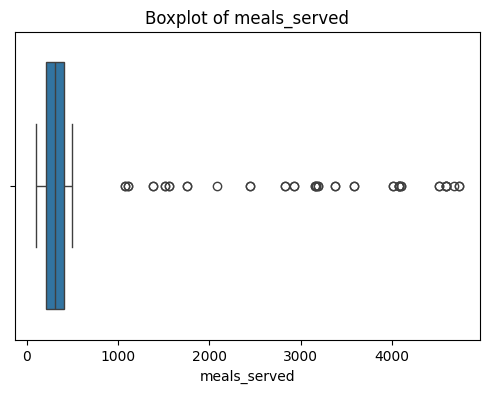

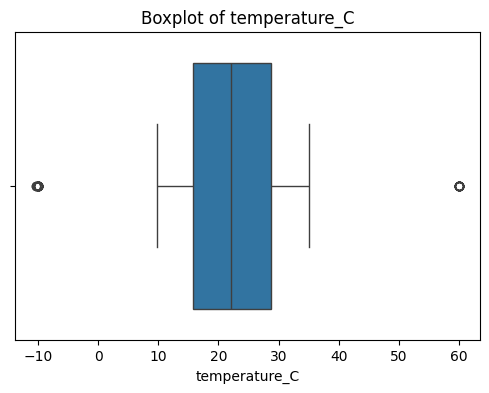

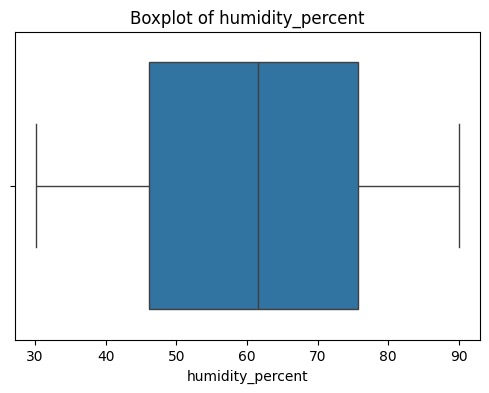

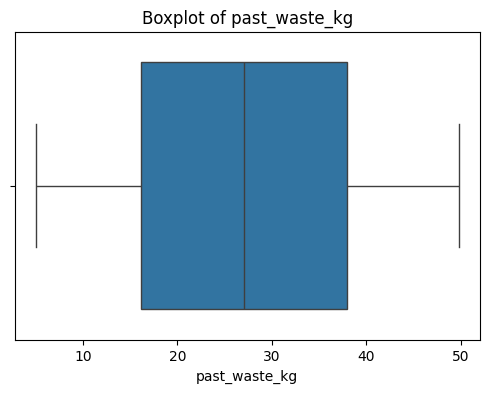

In [98]:
# Creating box plot for each column to detect if there are any out liers in our data.

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [99]:
# Writing Function to find the IQR of our columns and the cap extream values.

def cap_outliers_iqr(df, column):
    """
    Caps extreme values using the IQR method.

    Steps:
    1. Calculate Q1 (25th percentile) and Q3 (75th percentile).
    2. Compute the Interquartile Range (IQR).
    3. Determine lower and upper bounds using 1.5 * IQR.
    4. Cap values below the lower bound and above the upper bound.
    """

    # Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Step 2: Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Step 3: Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 4: Cap extreme values to the lower and upper bound
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])  # Cap lower outliers
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])  # Cap upper outliers

    return df  # Return updated DataFrame


columns_to_cap = ['meals_served', 'temperature_C']
for col in columns_to_cap:
    df = cap_outliers_iqr(df, col)

# Now the outliers are capped!

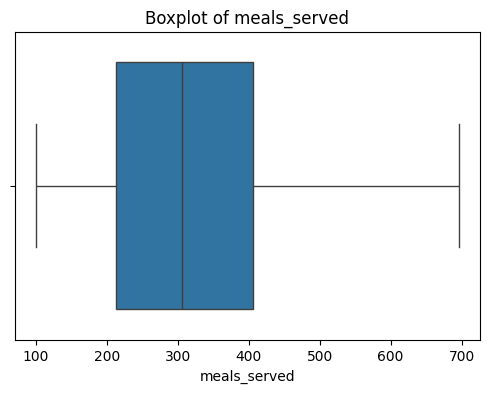

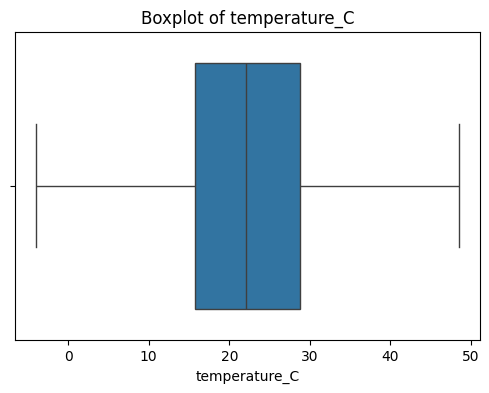

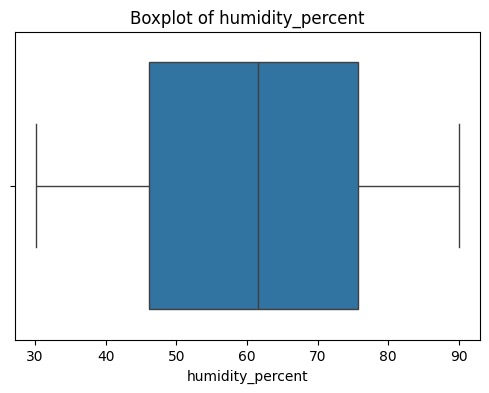

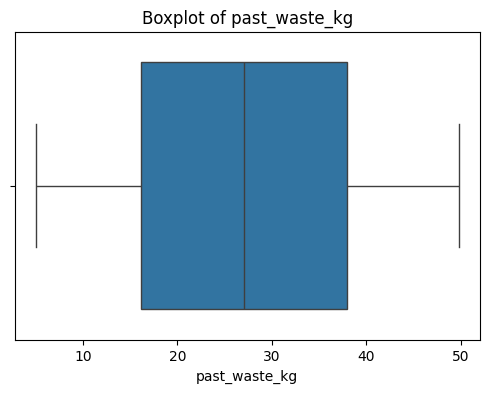

In [100]:
# Creating box plot again for each column to detect if there are any out liers left.

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Bar Plots: Visualizing Categorical Variable

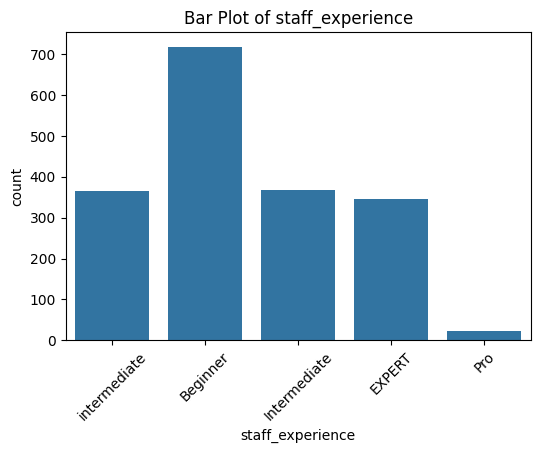

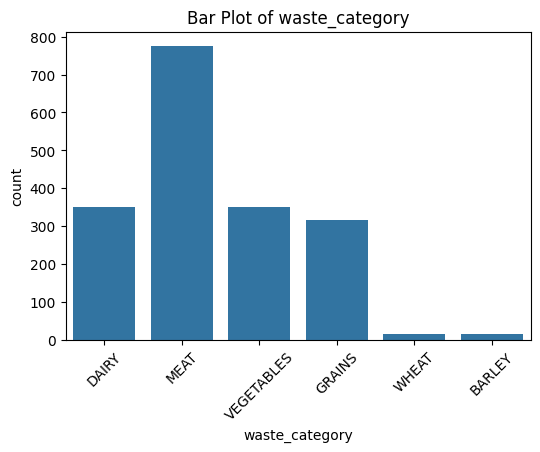

In [101]:
# Defining categorical columns

cat_cols = ['staff_experience', 'waste_category']

# Creating bar plots for each categorical column

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [102]:
# Computing corelation matrix for the numerical columns

correlation_matrix = df[num_cols].corr()

# Display correlation values
print(correlation_matrix)


                  meals_served  temperature_C  humidity_percent  past_waste_kg
meals_served          1.000000      -0.013666         -0.037105       0.020958
temperature_C        -0.013666       1.000000         -0.005471      -0.020392
humidity_percent     -0.037105      -0.005471          1.000000       0.014946
past_waste_kg         0.020958      -0.020392          0.014946       1.000000


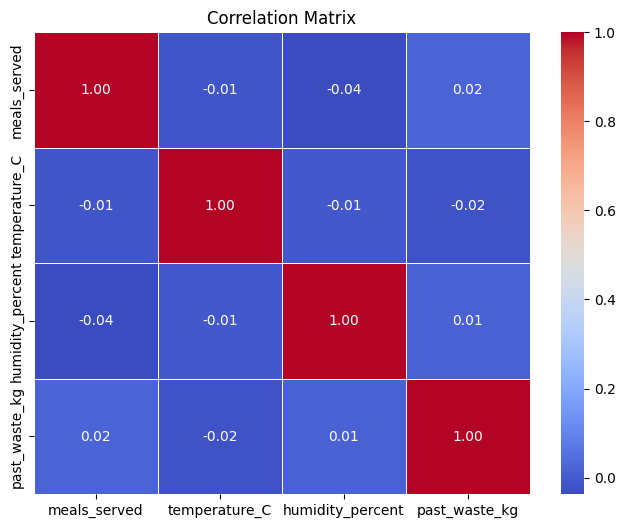

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

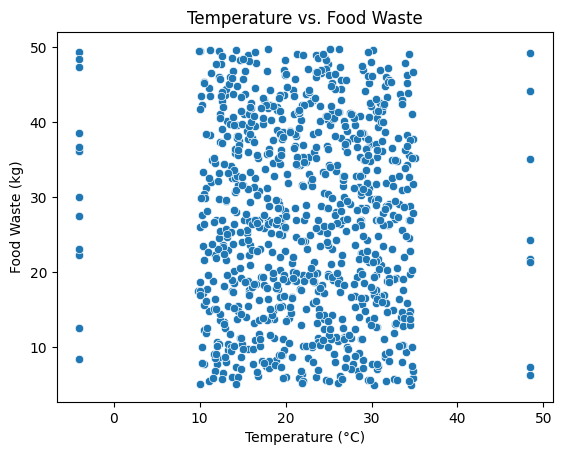

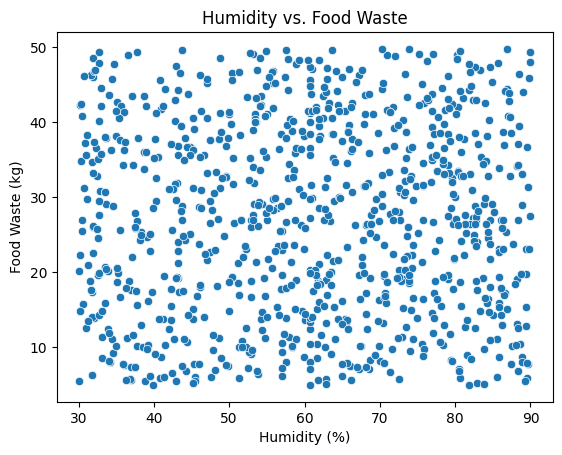

In [104]:
sns.scatterplot(x=df['temperature_C'], y=df['past_waste_kg'])
plt.title("Temperature vs. Food Waste")
plt.xlabel("Temperature (°C)")
plt.ylabel("Food Waste (kg)")
plt.show()

sns.scatterplot(x=df['humidity_percent'], y=df['past_waste_kg'])
plt.title("Humidity vs. Food Waste")
plt.xlabel("Humidity (%)")
plt.ylabel("Food Waste (kg)")
plt.show()

### 1.Both temperature and humidity have weak or no significant correlation with food waste


### 2.External factors (such as kitchen operations, food prep efficiency, or staff experience) might be more impactful than weather conditions.

In [105]:
# Calculate correlation coefficients and p-values
correlation_results = {}
for col in num_cols:
    corr, p_value = stats.pearsonr(df['meals_served'], df[col])  # Example: meals_served vs. each variable
    correlation_results[col] = {'Correlation': round(corr, 2), 'P-Value': round(p_value, 4)}

# Convert results to DataFrame for easier readability
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index')
print(correlation_df)

                  Correlation  P-Value
meals_served             1.00   0.0000
temperature_C           -0.01   0.5599
humidity_percent        -0.04   0.1134
past_waste_kg            0.02   0.3713


# Performing Hypothesis Testing.


In [106]:
# Defining categories based on kitchen staff numbers

df['kitchen_staff_group'] = pd.cut(df['kitchen_staff'], bins=[0, 5, 15, float('inf')], labels=['Low', 'Medium', 'High'])

In [107]:
# Grouping food waste by staff levels

groups = [df[df['kitchen_staff_group'] == group]['past_waste_kg'].dropna() for group in ['Low', 'Medium', 'High']]

# Now that we have grouped food waste by staff levels we will perform ANOVA test

anova_result = stats.f_oneway(*groups)

print(f'ANOVA Test - F-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}')

ANOVA Test - F-statistic: 5.65, P-value: 0.0036


## Interpreting ANOVA Results
### F-statistic = 5.65, P-value = 0.0036
### - The low p-value (< 0.05) suggests that kitchen staff levels significantly affect food waste.
### - This means we reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁)
### —there is a statistical difference in food waste across different kitchen staffing levels.
### - Since the F-statistic is 5.65, it indicates variance in food waste across different staffing groups (low, medium, high)


In [108]:
event_days = df[df['special_event'] == 1]['past_waste_kg'].dropna()
non_event_days = df[df['special_event'] == 0]['past_waste_kg'].dropna()

In [109]:
# Performing t-test

t_test_result = stats.ttest_ind(event_days, non_event_days, equal_var=False)
print(f'T-Test - Statistic: {t_test_result.statistic:.2f}, P-value: {t_test_result.pvalue:.4f}')

T-Test - Statistic: 0.29, P-value: 0.7737


## Interpreting t-Test
### - The high p-value (> 0.05) indicates that food waste does not significantly differ between special event and non-special event days.
### - This means we fail to reject the null hypothesis (H₀)—special events do not significantly increase food waste based on this dataset


## This part i am doing just for fun because i like this library it does all the EDA in a single line.
### But github is giving me error to upload it so i am commenting it out.

In [116]:
# profile = ProfileReport(df, title="Superstore Dataset Report", explorative=True)

In [118]:

# profile.to_notebook_iframe()